In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r'../dataset/predictive_maintenance.csv')


In [3]:
label_encoder = LabelEncoder()
df['Type_encoded'] = label_encoder.fit_transform(df['Type'])

features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
            'Torque [Nm]', 'Tool wear [min]', 'Type_encoded']
target = 'Target'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

feature_importances = model.feature_importances_
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")


Model accuracy: 0.98
Air temperature [K]: 0.1364
Process temperature [K]: 0.1340
Rotational speed [rpm]: 0.2364
Torque [Nm]: 0.3080
Tool wear [min]: 0.1593
Type_encoded: 0.0259


Missing values in each column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
Type_encoded               0
dtype: int64
Number of duplicate rows: 0
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000

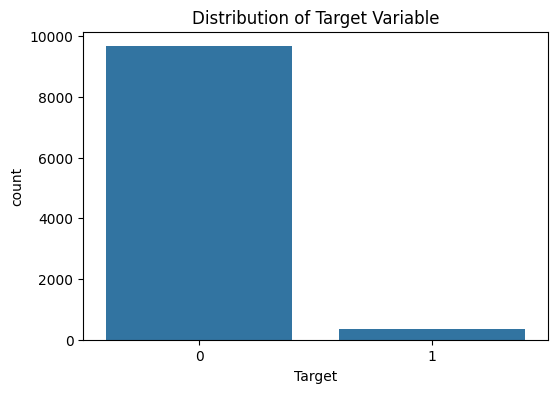

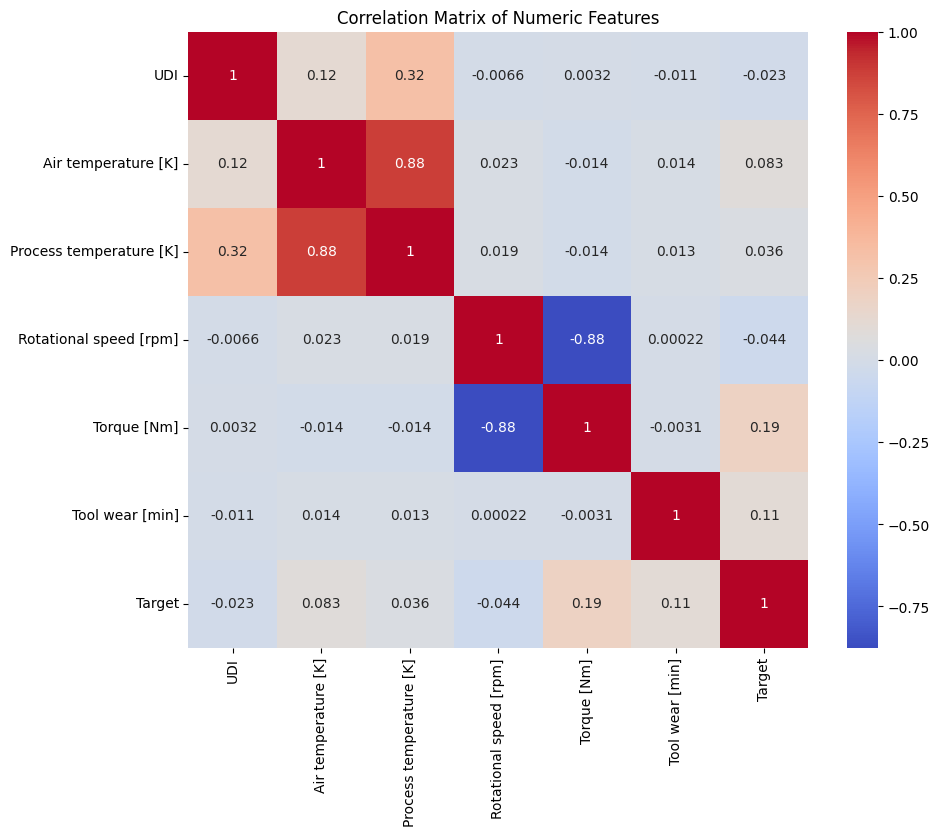

Selected features for predictive modeling: ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [4]:
print("Missing values in each column:\n", df.isnull().sum())


print("Number of duplicate rows:", df.duplicated().sum())

print(df.describe())

plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

numeric_data = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

selected_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
print("Selected features for predictive modeling:", selected_features)


In [5]:
avg_temp_air = df['Air temperature [K]'].mean()
avg_temp_process = df['Process temperature [K]'].mean()
avg_speed = df['Rotational speed [rpm]'].mean()
avg_torque = df['Torque [Nm]'].mean()
avg_tool_wear = df['Tool wear [min]'].mean()

min_temp_air, max_temp_air = df['Air temperature [K]'].min(), df['Air temperature [K]'].max()
min_temp_process, max_temp_process = df['Process temperature [K]'].min(), df['Process temperature [K]'].max()
min_speed, max_speed = df['Rotational speed [rpm]'].min(), df['Rotational speed [rpm]'].max()
min_torque, max_torque = df['Torque [Nm]'].min(), df['Torque [Nm]'].max()
min_tool_wear, max_tool_wear = df['Tool wear [min]'].min(), df['Tool wear [min]'].max()


In [6]:
target_distribution = df['Target'].value_counts(normalize=True)


In [7]:
mean_tool_wear_by_target = df.groupby('Target')['Tool wear [min]'].mean()

mean_temp_air_by_target = df.groupby('Target')['Air temperature [K]'].mean()
mean_temp_process_by_target = df.groupby('Target')['Process temperature [K]'].mean()

maintenance_by_type = df.groupby('Type')['Target'].mean()
print(maintenance_by_type)

Type
H    0.020937
L    0.039167
M    0.027694
Name: Target, dtype: float64


In [8]:
df['Temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']


df['Efficiency'] = df['Rotational speed [rpm]'] / df['Torque [Nm]']

bins = [df['Air temperature [K]'].min()-1, 295, 300, df['Air temperature [K]'].max()]
labels = ['Low', 'Medium', 'High']
df['Air_temp_category'] = pd.cut(df['Air temperature [K]'], bins=bins, labels=labels)


In [9]:
scaler = MinMaxScaler()

df[['Rotational speed [rpm]', 'Torque [Nm]']] = scaler.fit_transform(df[['Rotational speed [rpm]', 'Torque [Nm]']])

data = pd.get_dummies(df, columns=['Type'], prefix='Type')
data.head()


,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_encoded,Temp_diff,Efficiency,Air_temp_category,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,0.222934,0.535714,0,0,No Failure,2,10.5,36.238318,Medium,False,False,True
1,2,L47181,298.2,308.7,0.139697,0.583791,3,0,No Failure,1,10.5,30.410367,Medium,False,True,False
2,3,L47182,298.1,308.5,0.192084,0.626374,5,0,No Failure,1,10.4,30.323887,Medium,False,True,False
3,4,L47183,298.2,308.6,0.154249,0.490385,7,0,No Failure,1,10.4,36.278481,Medium,False,True,False
4,5,L47184,298.2,308.7,0.139697,0.497253,9,0,No Failure,1,10.5,35.200000,Medium,False,True,False
